# Prediction using Decision Tree Algorithm

# Objective

Visualize the dataset and predict the Classification with Decision Tree Algorithm and Visualize the Result

## Dataset

click here to download the dataset : https://bit.ly/3kXTdox

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
import graphviz

## Reading the dataset

In [2]:
# Prepare the data data
df = pd.read_csv('iris.csv')

In [3]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualizing the Feature Columns to see the Distance between each feature

<Figure size 1152x864 with 0 Axes>

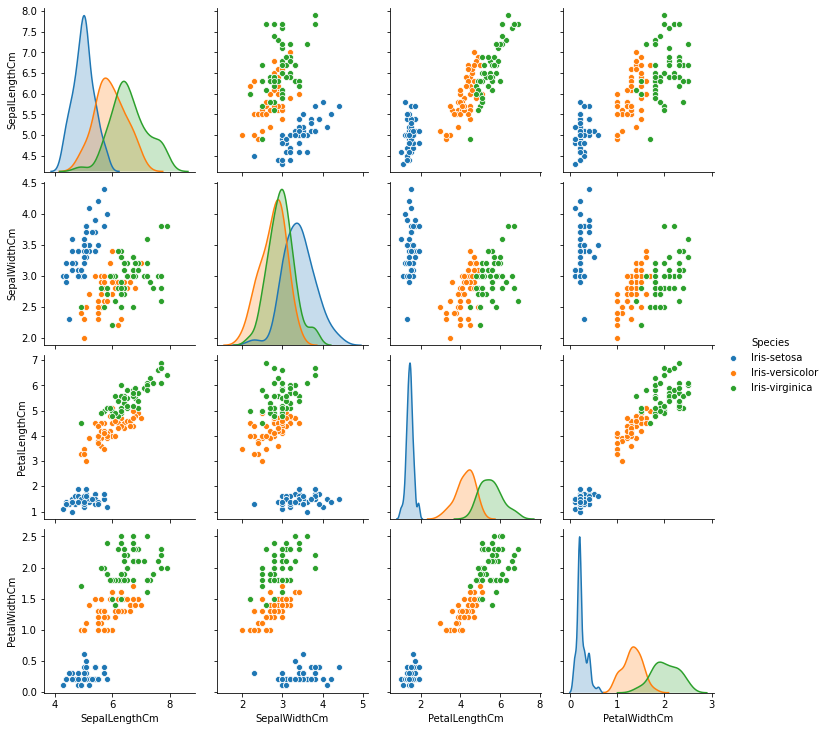

In [5]:
plt.figure(figsize=(16,12))
sns.pairplot(df,hue="Species")
plt.show()

## Visualizing the Feature Columns to see the Distribution

Text(0.5, 1.0, 'Histogram of PetalWidthCm')

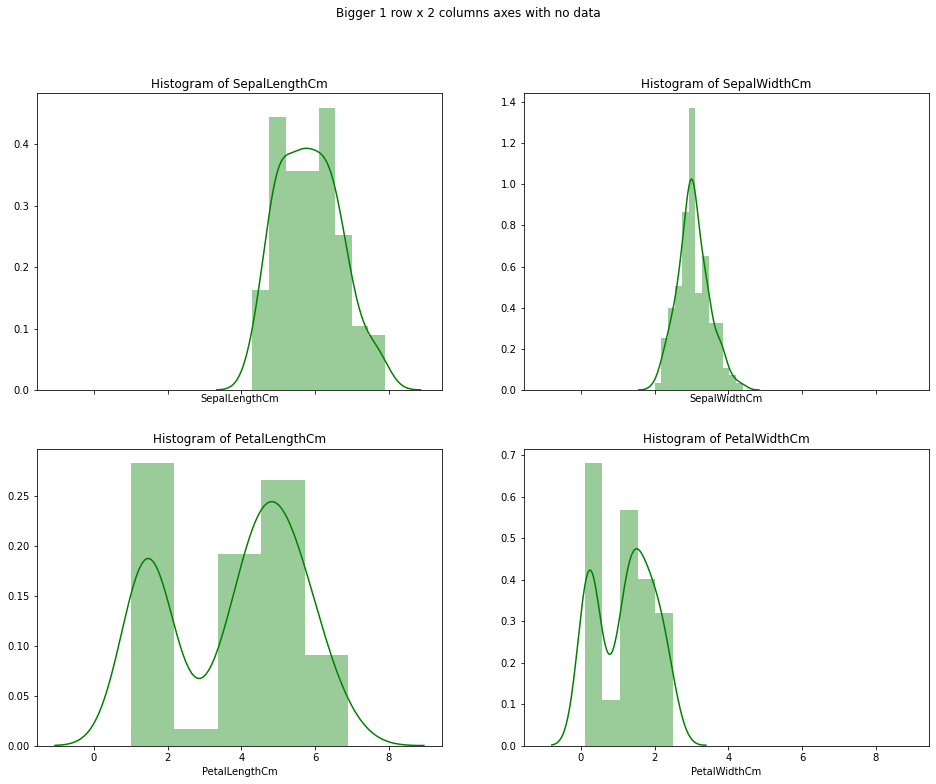

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,12))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')

sns.distplot(ax=axes[0,0], a = df["SepalLengthCm"],color="green")
axes[0,0].set_title("Histogram of SepalLengthCm")

sns.distplot(ax=axes[0,1],a=df["SepalWidthCm"],color="green")
axes[0,1].set_title("Histogram of SepalWidthCm")

sns.distplot(ax=axes[1,0],a=df["PetalLengthCm"],color="green")
axes[1,0].set_title("Histogram of PetalLengthCm")

sns.distplot(ax=axes[1,1],a=df["PetalWidthCm"],color="green")
axes[1,1].set_title("Histogram of PetalWidthCm")


## Plot Boxplot for checking the outlier

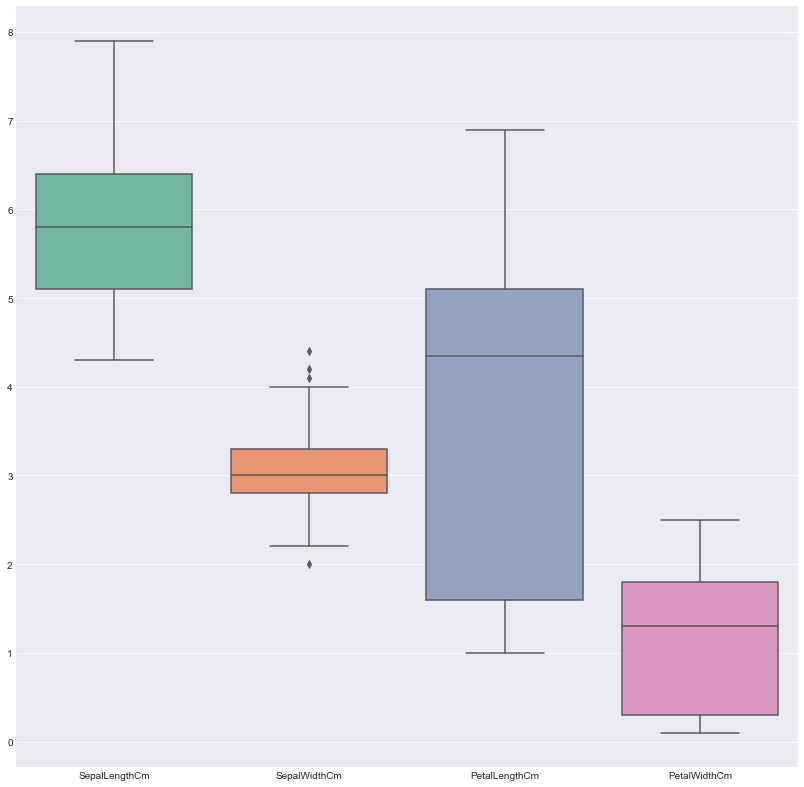

In [7]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,14))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()

## Remove Outlier by Inter Quartile Range

In [8]:
data = df.iloc[:,1]
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
outliers = [i for i in range(len(data)) if data[i] < lower or data[i] > upper]

In [9]:
print("Index of Outlier Row:",outliers)
df = df.drop(outliers,axis=0)
df.reset_index(drop=True)

Index of Outlier Row: [15, 32, 33, 60]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Iris-virginica
142,6.3,2.5,5.0,1.9,Iris-virginica
143,6.5,3.0,5.2,2.0,Iris-virginica
144,6.2,3.4,5.4,2.3,Iris-virginica


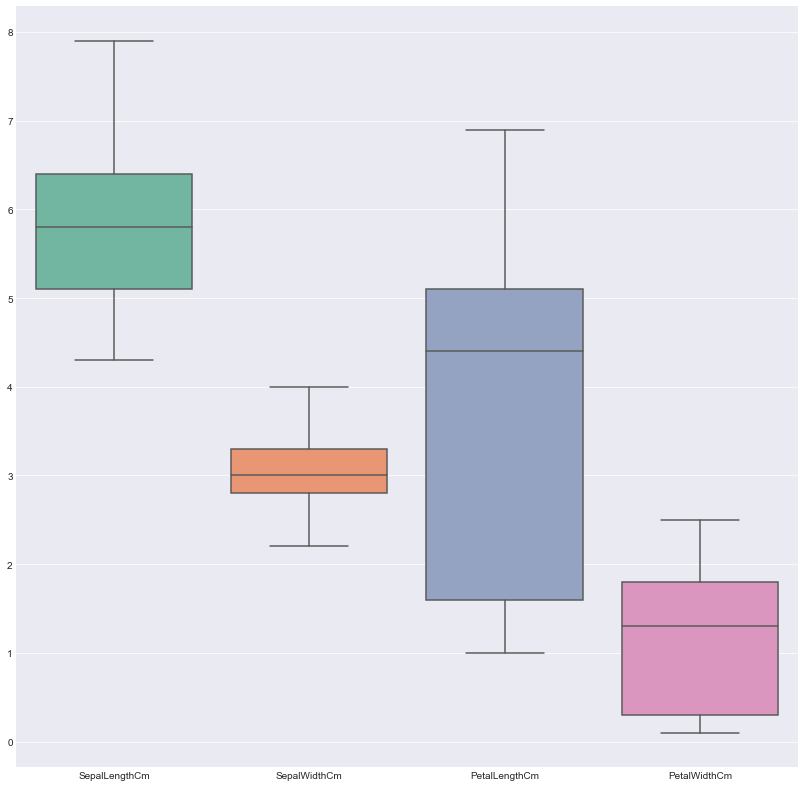

In [10]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,14))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()

## Spliting the dataset into feature and target Column

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Spliting the dataset into train and test dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Decision Tree Algorithm

In [13]:
clf = DecisionTreeClassifier(random_state=1234,criterion='entropy',min_samples_leaf=2)
model = clf.fit(X_train, y_train)

## Prediction

In [14]:
model.score(X_test,y_test)

1.0

## Textual Representation of the Spliting tree

In [15]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_0 <= 5.15
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.15
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



## Graphical Representation of the Spliting tree

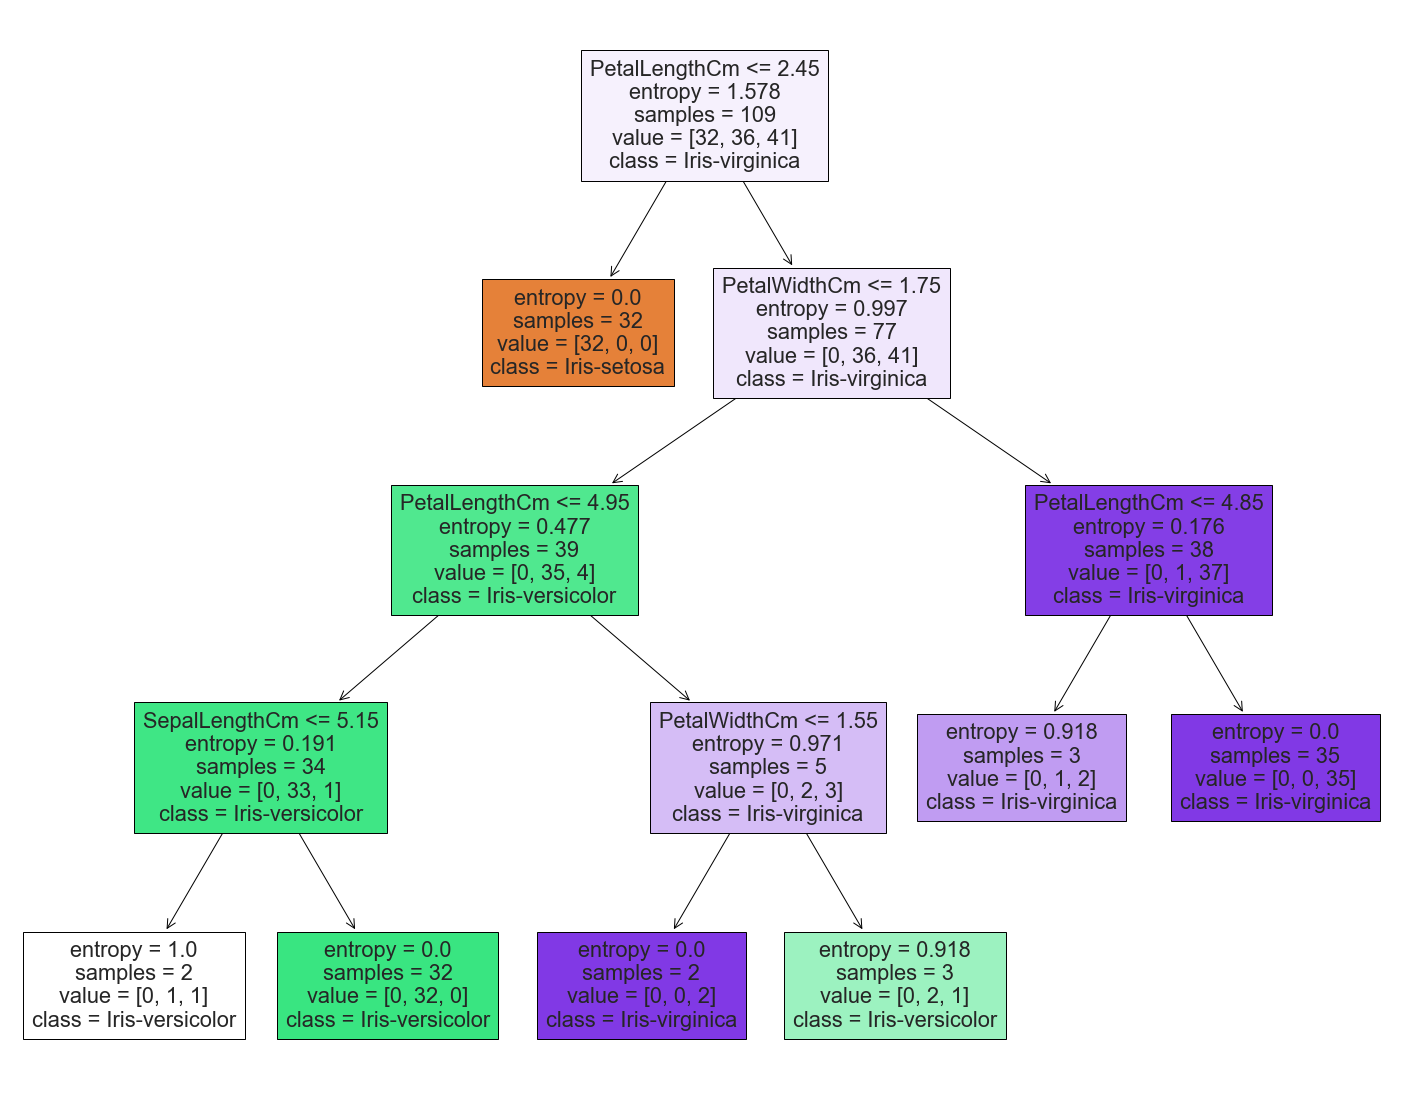

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=np.unique(y),
                   filled=True)